In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from tslearn.datasets import CachedDatasets, UCR_UEA_datasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, TimeSeriesResampler
from tslearn.metrics import cdist_dtw

from sklearn.mixture import BayesianGaussianMixture
from sklearn.decomposition import PCA

In [2]:
# データセット可視化メソッド
def plot_data(X_train, y_train, name):
    plt.figure(figsize=(12,5))

    # true
    # plt.subplot(1, 2, 1)
    label = np.unique(y_train)
    # カラーマップを定義
    cmap = plt.get_cmap('tab10')  # タブルランカラーマップを使用
    colors = [cmap(i) for i in range(len(label))]

    for class_label in label:
        class_data = X_train[y_train == class_label][:,:,0].T
        plt.plot(class_data, label=f'_Class {class_label}', color=colors[class_label - 1], alpha=0.4)
        plt.plot([], label=f'Class {class_label}', color=colors[class_label - 1], alpha=0.3)

    plt.legend()
    # plt.text(0.05,0.95,'pred', transform=plt.gca().transAxes)
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title(f'{name}')

    plt.tight_layout()
    plt.show()

# クラスタリング結果可視化メソッド
def plot_result(X_train, y_train, models, data_name):
    n_model = len(models)
    plt.figure(figsize=(12,5 * math.ceil(n_model/2)))

    # true
    plt.subplot(math.ceil(n_model/2), 2, 1)
    label = np.unique(y_train)
    # カラーマップを定義
    cmap = plt.get_cmap('tab10')  # タブルランカラーマップを使用
    colors = [cmap(i) for i in range(len(label))]

    for class_label in label:
        class_data = X_train[y_train == class_label][:,:,0].T
        plt.plot(class_data, label=f'_Class {class_label}', color=colors[class_label - 1], alpha=0.4)
        plt.plot([], label=f'Class {class_label}', color=colors[class_label - 1], alpha=1)

    plt.legend()
    # plt.text(0.05,0.95,'pred', transform=plt.gca().transAxes)
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title(f'{data_name} True')

    # pred
    n=2
    for name, model in models.items():
        plt.subplot(math.ceil(n_model/2),2,n)
        y_pred = model.labels_

        label = np.unique(y_pred)
        # カラーマップを定義
        cmap = plt.get_cmap('tab10')  # タブルランカラーマップを使用
        colors = [cmap(i) for i in range(len(label))]

        for class_label in label:
            class_data = X_train[y_pred == class_label][:,:,0].T
            plt.plot(class_data, label=f'_Class {class_label}', color=colors[class_label - 1], alpha=0.4)
            plt.plot([], label=f'Class {class_label}',
                    color=colors[class_label - 1])

        plt.legend()
        # plt.text(0.05,0.95,'pred', transform=plt.gca().transAxes)
        plt.xlabel('Time')
        plt.title(f'{name} Pred')

        n += 1

    plt.tight_layout()
    plt.show()

n_components=10で実行

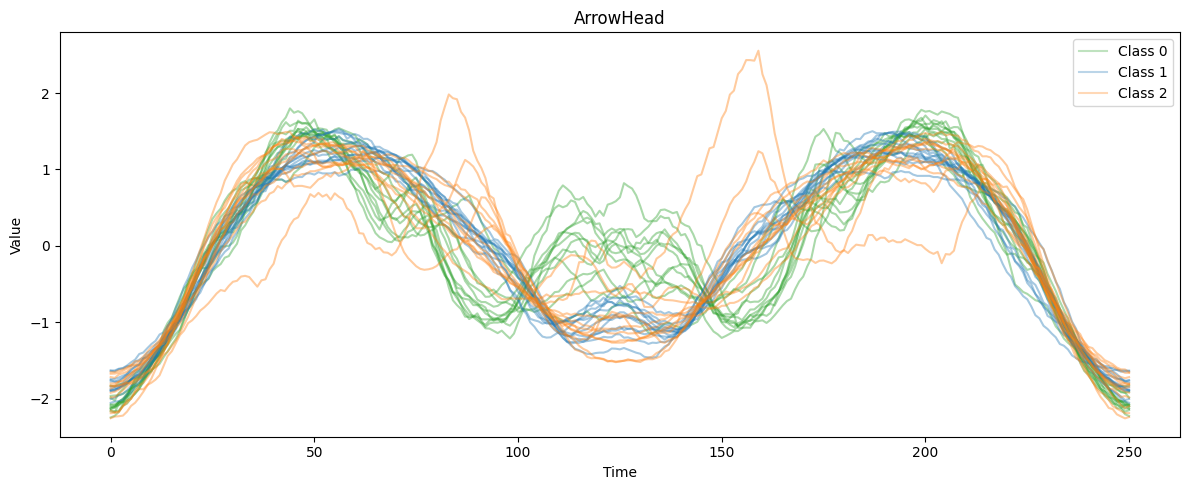

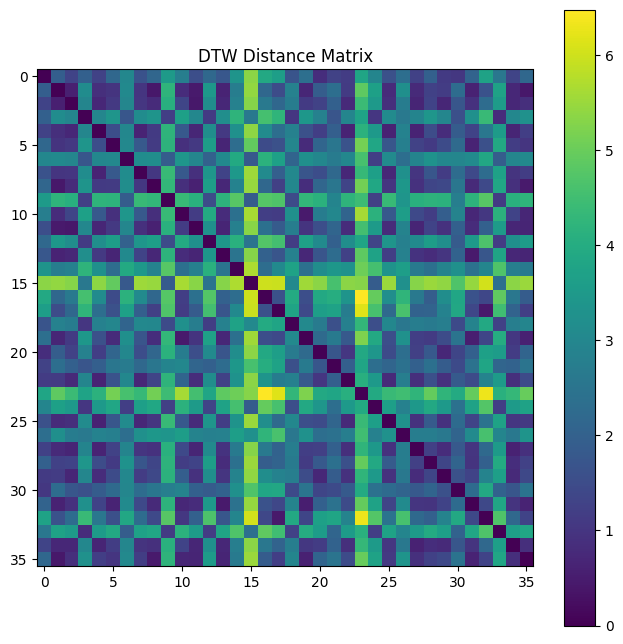

fitting...  DPGMM


In [24]:
data_name = 'ArrowHead'
models = {
    'DPGMM':BayesianGaussianMixture(
        n_components=10,
        covariance_type="full",
        weight_concentration_prior=1e-2,
        weight_concentration_prior_type="dirichlet_process",
        mean_precision_prior=1e-2,
        # covariance_prior=1e0 * np.eye(2),
        init_params="kmeans",
        # n_init=10,
        max_iter=10000,
        random_state=2,
    ),

}

# データセットの読み込み（ここではUCR/UEAデータセットを使用）
X_train, y_train, X_test, y_test = UCR_UEA_datasets().load_dataset(data_name)

plot_data(X_train, y_train, data_name)

# DTWの距離行列を計算
distance_matrix = cdist_dtw(X_train)
# ヒートマップのプロット
plt.figure(figsize=(8, 8))
plt.imshow(distance_matrix, cmap='viridis', interpolation='nearest')
plt.title("DTW Distance Matrix")
plt.colorbar()
plt.show()


for name, model in models.items():
    print('fitting... ', name)
    model.fit(distance_matrix)


# plot_result(X_train, y_train, models, data_name)

In [25]:
models['DPGMM'].predict(distance_matrix)

array([4, 1, 3, 2, 3, 1, 6, 3, 1, 2, 1, 3, 2, 1, 8, 0, 5, 5, 2, 1, 4, 4,
       3, 7, 2, 3, 9, 3, 1, 3, 4, 1, 5, 2, 3, 1])

In [26]:
models['DPGMM'].weights_

array([0.05404155, 0.26270409, 0.17708454, 0.24093707, 0.11043785,
       0.07732028, 0.03094355, 0.02322695, 0.01551036, 0.00779376])

n_components=30で実行

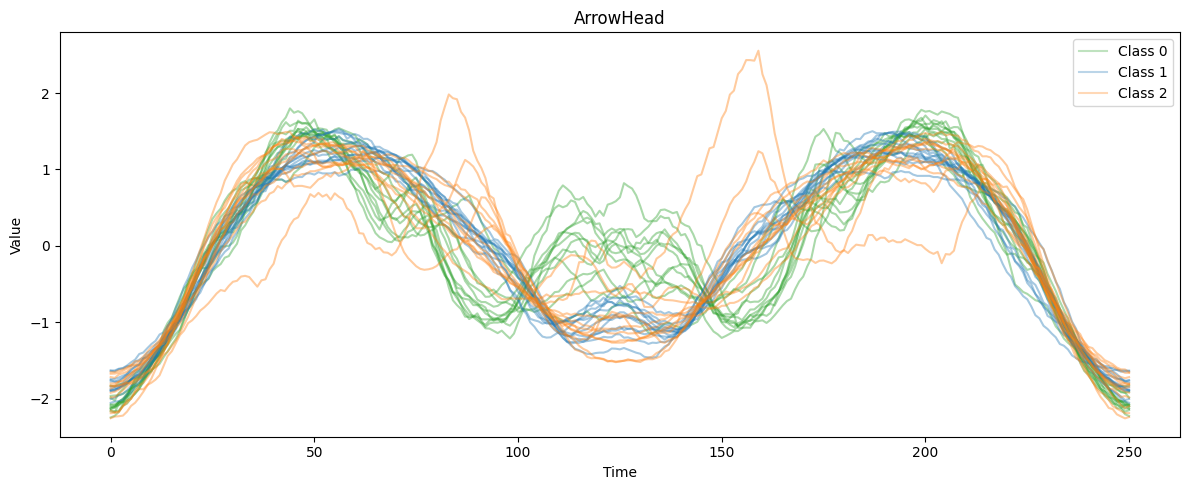

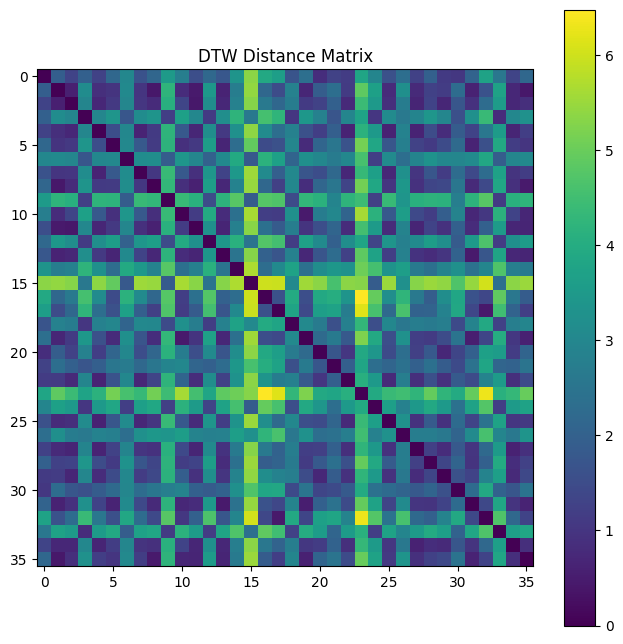

fitting...  DPGMM
Initialization 0
Initialization converged: True


In [27]:
data_name = 'ArrowHead'
models = {
    'DPGMM':BayesianGaussianMixture(
        n_components=30,
        covariance_type="full",
        weight_concentration_prior=1e-2,
        weight_concentration_prior_type="dirichlet_process",
        mean_precision_prior=1e-2,
        # covariance_prior=1e0 * np.eye(2),
        init_params="kmeans",
        # n_init=10,
        max_iter=100000,
        random_state=2,
        verbose=1,
    ),

}

# データセットの読み込み（ここではUCR/UEAデータセットを使用）
X_train, y_train, X_test, y_test = UCR_UEA_datasets().load_dataset(data_name)

plot_data(X_train, y_train, data_name)

# DTWの距離行列を計算
distance_matrix = cdist_dtw(X_train)
# ヒートマップのプロット
plt.figure(figsize=(8, 8))
plt.imshow(distance_matrix, cmap='viridis', interpolation='nearest')
plt.title("DTW Distance Matrix")
plt.colorbar()
plt.show()


for name, model in models.items():
    print('fitting... ', name)
    model.fit(distance_matrix)


# plot_result(X_train, y_train, models, data_name)

In [28]:
models['DPGMM'].predict(distance_matrix)

array([19, 18, 26, 21, 24, 25, 12, 13, 18, 11, 27,  1,  2, 23,  3,  0, 14,
        6, 17,  7, 16, 20, 28,  5, 10, 13,  8, 29, 15,  9,  4, 23,  6, 22,
       29, 18])

In [29]:
models['DPGMM'].weights_

array([0.05404058, 0.05253987, 0.05103916, 0.04953845, 0.04803774,
       0.04653703, 0.06755448, 0.04348388, 0.04193144, 0.040379  ,
       0.03882656, 0.03727411, 0.03572167, 0.05125385, 0.0325429 ,
       0.03091657, 0.02929024, 0.0276639 , 0.05207515, 0.02417907,
       0.02232057, 0.02046208, 0.01860358, 0.02511762, 0.01465456,
       0.01256403, 0.01047351, 0.00838299, 0.00629247, 0.00630292])

クラスター数の最適化をしてくれない。なぜ？？

今回のデータセットの場合、データ数と説明変数の次元数が一緒なので、そこら辺が影響してクラスター数がマックスの状態を最適と判定しているのではないか？

説明変数の次元が多いことが問題であれば、前段で次元削減してみる

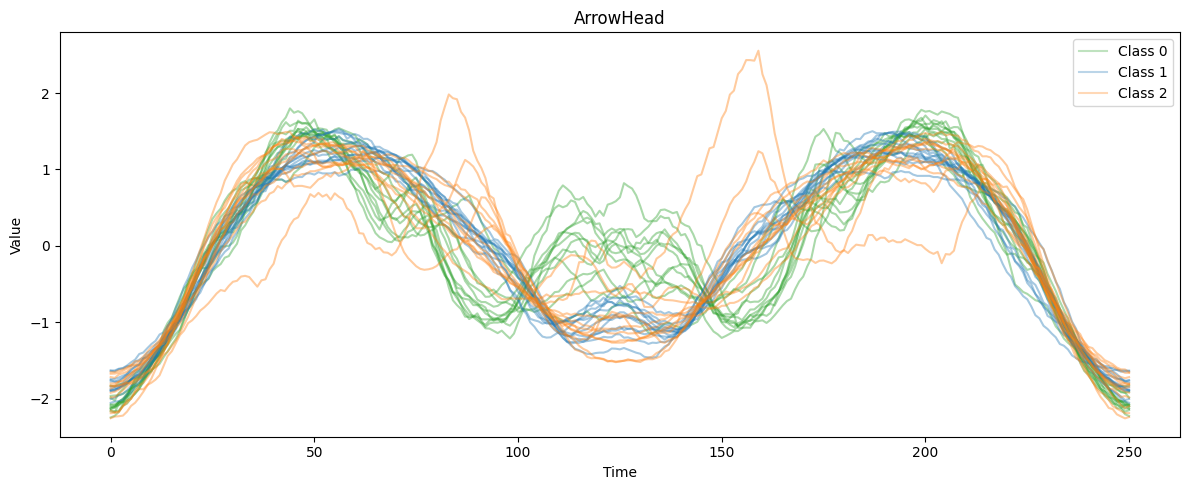

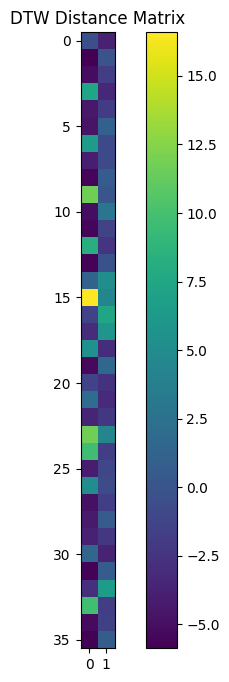

fitting...  DPGMM
Initialization 0
  Iteration 10
Initialization converged: True


In [32]:
data_name = 'ArrowHead'
models = {
    'DPGMM':BayesianGaussianMixture(
        n_components=10,
        covariance_type="full",
        weight_concentration_prior=1e-2,
        weight_concentration_prior_type="dirichlet_process",
        mean_precision_prior=1e-2,
        # covariance_prior=1e0 * np.eye(2),
        init_params="kmeans",
        # n_init=10,
        max_iter=10000,
        random_state=2,
        verbose=1
    ),

}

# データセットの読み込み（ここではUCR/UEAデータセットを使用）
X_train, y_train, X_test, y_test = UCR_UEA_datasets().load_dataset(data_name)

plot_data(X_train, y_train, data_name)

# DTWの距離行列を計算
distance_matrix = cdist_dtw(X_train)

# PCA
pca = PCA(n_components=2)
X_train = pca.fit_transform(distance_matrix)

# ヒートマップのプロット
plt.figure(figsize=(8, 8))
plt.imshow(X_train, cmap='viridis', interpolation='nearest')
plt.title("DTW Distance Matrix")
plt.colorbar()
plt.show()


for name, model in models.items():
    print('fitting... ', name)
    model.fit(X_train)


# plot_result(X_train, y_train, models, data_name)

In [33]:
models['DPGMM'].predict(X_train)

array([2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 3, 0, 3, 3, 2, 1, 1, 2,
       1, 0, 2, 1, 2, 1, 1, 1, 2, 1, 3, 2, 1, 1])

In [34]:
models['DPGMM'].weights_

array([8.14000571e-02, 5.23127302e-01, 2.96147859e-01, 9.91275248e-02,
       1.95304238e-04, 1.93370532e-06, 1.91455972e-08, 1.89560369e-10,
       1.87683533e-12, 1.85825281e-14])

前段で次元削減を入れると、ちゃんとクラスター数の選択が行われた。